Construir Moduladores e Demoduladores em BP
Construir os seguintes moduladores e seus correspondentes demoduladores:

M - ASK; DQPSK; M-PSK  e M-QAM.

Para cada um dos moduladores, apresentar o diagrama de constelação do sinal transmitido e recebido após ter passado por um canal awgn com possibilidade de variar a relação Sinal/Ruído.

# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
np.random.seed(40)  # semente para gerar os mesmos números aleatórios

# Constantes

In [7]:
n_simbolos = 1000
amostras_por_simbolo = 160
n_bits = 2
taxa_de_modulacao = 1000 #baud/s
taxa_de_transmissao = taxa_de_modulacao * n_bits #bps
frequencia_central = 1000 # Hz
amplitude = 1 # Amplitudade da Portadora em Volts
periodo_de_amostragem = n_simbolos / taxa_de_modulacao / amostras_por_simbolo
frequencia_de_amostragem = 1 / periodo_de_amostragem

# plot
simbolos_no_grafico = 30
show_amostras = simbolos_no_grafico*amostras_por_simbolo
# vetores
tempo = np.linspace(0, n_simbolos / taxa_de_modulacao, n_simbolos * amostras_por_simbolo)

# Portadora

In [8]:
class Portadora:
    T = tempo
    def __init__(self,amplitude,frequencia,fase=0) -> None:
        self.a = amplitude
        self.f = frequencia
        self.phase = fase
    
    @property
    def wave(self):
        return self.a*np.cos(2*np.pi*self.f*self.T + self.phase)

portadora = Portadora(amplitude,frequencia_central)

# M-ASK

## Modulador

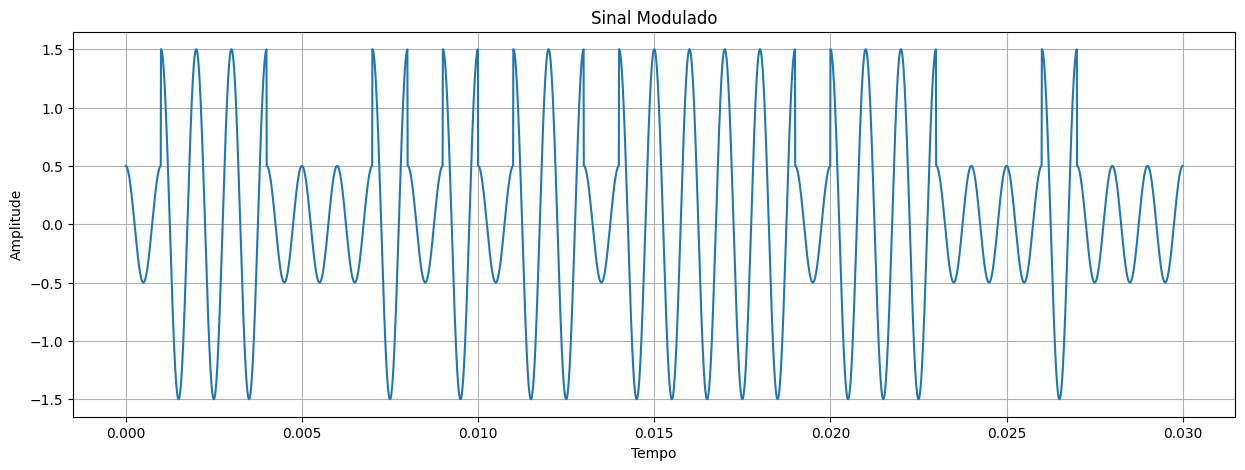

In [9]:
class Ask:
    def __init__(self,portadora,m=2):
        self.amplitudes = {0:.5,
                           1:1.5,
                           2:2.5,
                           3:3.5} # símbolo:tensão
        
        self.portadora = portadora
        self.simbolos = np.random.randint(0,m,n_simbolos)
        self.sinal = np.array([self.amplitudes[s] for s in self.simbolos]) # codifica os símbolos em tensões
        self.wave = np.repeat(self.sinal,amostras_por_simbolo)
        self.wave = self.wave*portadora.wave
    
    def show(self):
        """Shows the bit signal and the coded signal in a subplot
        """        
        fig = plt.figure(figsize=(15,5))
        plt.plot(tempo[:show_amostras],self.wave[:show_amostras])
        plt.title("Sinal Modulado")
        plt.ylabel("Amplitude")
        plt.xlabel("Tempo")
        plt.grid()
        plt.show()

# Instancia a classe e mostra o gráfico
ask = Ask(portadora)
ask.show()

## Demodulador

# D-QPSK

# M-PSK

## Modulador

In [11]:
class Psk:
    def __init__(self,portadora,m=2):
        self.frequencias = {}        

## Demodulador

# M-QAM

## Modulador

## Demodulador